In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [2]:
import torchvision
import torchvision.transforms as transforms

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 144
plt.rcParams['font.family']=['Arial Unicode MS']
sns.set()
sns.set_style("whitegrid")

In [5]:
device = device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [6]:
side = 28
input_size = side ** 2
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [7]:
train_dataset = torchvision.datasets.MNIST(root='../../dataset/mnist/',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)

In [8]:
test_dataset = torchvision.datasets.MNIST(root='../../dataset/mnist/',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [10]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [11]:
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.fc2 = nn.Linear(500, 314)
        self.fc3 = nn.Linear(314, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [12]:
model = Net(input_size, num_classes).to(device)

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
total_step = len(train_loader)

Epoch [1/5], Step [100/600], Loss: 0.2672
Epoch [1/5], Step [200/600], Loss: 0.2198
Epoch [1/5], Step [300/600], Loss: 0.2244
Epoch [1/5], Step [400/600], Loss: 0.1210
Epoch [1/5], Step [500/600], Loss: 0.2344
Epoch [1/5], Step [600/600], Loss: 0.0698
Epoch [2/5], Step [100/600], Loss: 0.0980
Epoch [2/5], Step [200/600], Loss: 0.0399
Epoch [2/5], Step [300/600], Loss: 0.0518
Epoch [2/5], Step [400/600], Loss: 0.0904
Epoch [2/5], Step [500/600], Loss: 0.0990
Epoch [2/5], Step [600/600], Loss: 0.0824
Epoch [3/5], Step [100/600], Loss: 0.0230
Epoch [3/5], Step [200/600], Loss: 0.0849
Epoch [3/5], Step [300/600], Loss: 0.0558
Epoch [3/5], Step [400/600], Loss: 0.0153
Epoch [3/5], Step [500/600], Loss: 0.1306
Epoch [3/5], Step [600/600], Loss: 0.0359
Epoch [4/5], Step [100/600], Loss: 0.0555
Epoch [4/5], Step [200/600], Loss: 0.0392
Epoch [4/5], Step [300/600], Loss: 0.0436
Epoch [4/5], Step [400/600], Loss: 0.0745
Epoch [4/5], Step [500/600], Loss: 0.0655
Epoch [4/5], Step [600/600], Loss:

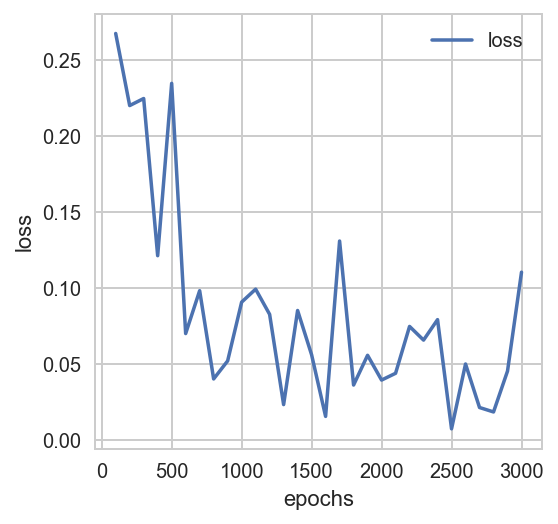

In [15]:
idx = []
losses = []
for epoch in range(1, num_epochs + 1):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, num_epochs, i + 1, total_step, loss.item()))
            idx.append((epoch - 1) * total_step + i + 1)
            losses.append(loss.item())
            
plt.plot(idx, losses, label="loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [17]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        pred = outputs.argmax(1)
        total += labels.size(0)
        correct += (pred == labels).sum()
        acc = correct.item() / total
    print("After {:5d} tests, accuracy is  : {:5f}".format(total, acc))

After 10000 tests, accuracy is  : 0.974400
